In [48]:
import numpy as np
import pandas as pd

# filename should be type string ex. 'precipitation.csv' and file path should be in relation to where this file is stored
def TStoStorms(filename, dryTimeBetweenStorms):
    '''accepts a precipitation time series and number of dry time steps before a storm ends and splits it into individual storms'''
    
    # read data from csv
    headers = ['datetime', 'pr']
    dtypes = {'col1': 'str', 'col2': 'float'}
    date_cols = ['datetime']
    storms_data = pd.read_csv(filename, dtype = dtypes, header=None, names = headers, parse_dates = date_cols)

    storms_data.loc[ : , 'pr'] = storms_data.loc[ : , 'pr'] / 25.4


    dry = dryTimeBetweenStorms # counter to iterate only on dry days

    # establish big list (storms) which will contain all storms, separated
    # establish little list (current_storm) which will hold precipitation for one storm until it goes to big list
    storms = []
    current_storm = []
    storms.append(current_storm)

    for value in storms_data.loc[ : , 'pr']:
        dry += 1 # count the number of consecutive dry steps


        # if precipitation is higher than a certain threshold, reset dry counter
        if value >= 0.01: 
            dry = 0

        # when during a storm, append the current precip value to small list, which is continuously updating big list simultaneously
        if dry < dryTimeBetweenStorms: 
            current_storm.append(value)

        # when the dry time reaches the threshold to end a storm, begin a new small list that is being appended to big list
        elif dry == dryTimeBetweenStorms: 
            current_storm = []
            storms.append(current_storm)

    #     print(dry, value) # by using this, you can see that it does take need dryTimeBetweenStorms time steps to all be zero before moving to the next storm, it just doesn't count them all in that storm's list entry

    return(storms)
    
    
TStoStorms('sample_precip1.csv', 5);


In [4]:
import pandas as pd
import numpy as np

In [6]:
import pandas as pd

# read data from csv
headers = ['datetime', 'pr']
dtypes = {'col1': 'str', 'col2': 'float'}
date_cols = ['datetime']
storms_data = pd.read_csv('sample_precip1.csv', dtype = dtypes, header=None, names = headers, parse_dates = date_cols)

storms_data.loc[ : , 'pr'] = storms_data.loc[ : , 'pr'] / 25.4

# # ======================== Use this to convert to np ndarray with weird timestep labels ==============================
# storms_data = storms_data.to_numpy()
# storms_data 
# ======================== Use below to create messy pandas df =======================================================

dryTimeBetweenStorms = 5
dry = dryTimeBetweenStorms # counter to iterate only on dry days

    # establish big list (storms) which will contain all storms, separated
    # establish little list (current_storm) which will hold precipitation for one storm until it goes to big list
storms = []
current_storm = []
storms.append(current_storm)

# for count, value in enumerate(storms_data.loc[ : ,'pr']):
#     storms_data.iloc[[count]]

for count, value in enumerate(storms_data.loc[ : ,'pr']):    
    dry += 1 # count the number of consecutive dry steps

    # if precipitation is higher than a certain threshold, reset dry counter
    if value >= 0.01: 
        dry = 0

    # when during a storm, append the current precip value to small list, which is continuously updating big list simultaneously
    if dry < dryTimeBetweenStorms: 
        current_storm.append(storms_data.iloc[[count]])

    # when the dry time reaches the threshold to end a storm, begin a new small list that is being appended to big list
    elif dry == dryTimeBetweenStorms: 
        current_storm = []
        storms.append(current_storm)
        
display(storms)

# #===========================================================================
# Pandas
# Try removing headings
# In R, this is an issue with subsetting the rows (square brackets)
# Change the type of the data from df to vector
# Check for alternatives with append()

# Check MARISA Dataset for probability distributions for CDFs and other such things


# #===========================================================================

[[             datetime   pr
  1 2000-01-01 00:05:00  1.0,
               datetime   pr
  2 2000-01-01 00:10:00  1.0,
               datetime   pr
  3 2000-01-01 00:15:00  1.0,
               datetime   pr
  4 2000-01-01 00:20:00  1.0,
               datetime   pr
  5 2000-01-01 00:25:00  1.0,
               datetime   pr
  6 2000-01-01 00:30:00  1.0,
               datetime   pr
  7 2000-01-01 00:35:00  1.0,
               datetime   pr
  8 2000-01-01 00:40:00  1.0,
               datetime   pr
  9 2000-01-01 00:45:00  1.0,
                datetime   pr
  10 2000-01-01 00:50:00  1.0,
                datetime   pr
  11 2000-01-01 00:55:00  0.0,
                datetime   pr
  12 2000-01-01 01:00:00  0.0,
                datetime   pr
  13 2000-01-01 01:05:00  0.0,
                datetime   pr
  14 2000-01-01 01:10:00  0.0],
 [              datetime   pr
  16 2000-01-01 01:20:00  1.0,
                datetime   pr
  17 2000-01-01 01:25:00  0.0,
                datetime   pr
  18 2000-0

In [7]:
import pandas as pd

# read data from csv
headers = ['datetime', 'pr']
dtypes = {'col1': 'str', 'col2': 'float'}
date_cols = ['datetime']
storms_data = pd.read_csv('sample_precip1.csv', dtype = dtypes, header=None, names = headers, parse_dates = date_cols)

storms_data.loc[ : , 'pr'] = storms_data.loc[ : , 'pr'] / 25.4

# # ======================== Use this to convert to np ndarray with weird timestep labels ==============================
# storms_data = storms_data.to_numpy()
# storms_data 
# ======================== Use below to create messy pandas df =======================================================

dryTimeBetweenStorms = 5
dry = dryTimeBetweenStorms # counter to iterate only on dry days

    # establish big list (storms) which will contain all storms, separated
    # establish little list (current_storm) which will hold precipitation for one storm until it goes to big list
storms = pd.DataFrame(columns=['datetime', 'pr'])
current_storm = pd.DataFrame()
storms.append(current_storm)


for count, value in enumerate(storms_data.loc[ : ,'pr']):    
    dry += 1 # count the number of consecutive dry steps

    # if precipitation is higher than a certain threshold, reset dry counter
    if value >= 0.01: 
        dry = 0

    # when during a storm, append the current precip value to small list, which is continuously updating big list simultaneously
    if dry < dryTimeBetweenStorms: 


#         df.loc[4] = df.loc[1].copy()  
        
        
#     # when the dry time reaches the threshold to end a storm, begin a new small list that is being appended to big list
#     elif dry == dryTimeBetweenStorms: 
#         current_storm = []
#         storms.append(current_storm)
        
print(storms)

# #===========================================================================
# Pandas
# Try removing headings
# In R, this is an issue with subsetting the rows (square brackets)
# Change the type of the data from df to vector
# Check for alternatives with append()

# Check MARISA Dataset for probability distributions for CDFs and other such things


# #===========================================================================

IndentationError: expected an indented block (<ipython-input-7-bfa3fbbfbae3>, line 45)

In [8]:
import pandas as pd
def TStoRollingSum(filename):
    '''method does not work'''
    
    # read data from csv
    headers = ['datetime', 'pr']
    dtypes = {'col1': 'str', 'col2': 'float'}
    date_cols = ['datetime']
    storms_data = pd.read_csv(filename, dtype = dtypes, header=None, names = headers, parse_dates = date_cols)
    
    # perform unit conversions
    storms_data.loc[ : , 'pr'] = storms_data.loc[ : , 'pr'] / 25.4

    # determine time step by subtracting one datetime from another
    TS = storms_data.loc[1, 'datetime'] - storms_data.loc[0, 'datetime']
    # convert time delta type to int type in minutes
    TS = int(TS.total_seconds() / 60)
    
    # Create set that contains all the storm durations being used in minutes
    stormDurations = [60, 120, 480]
    
    rollings_avgs_all_durations = []
    for duration in stormDurations:
        timesteps = int(duration / TS)
    
        # initialize empty list
        rolling_list = []
        # loop through precip tables to compute rolling sums and grab datetimes
        for count, value in enumerate(storms_data.loc[ : ,'pr']):
            # will grab the start time for each rolling sum and store in a list
            rolling_start_datetime = storms_data.loc[ : , 'datetime']
            # will do a rolling sum through a series
            rolling_sum = storms_data.iloc[count:timesteps + count].sum(axis=0, numeric_only = 'TRUE')
            # will compile a list of the rolling sums
            rolling_list.append(rolling_sum)

        # create individual dataframes that contain the datetime and pr_total columns
        df_list = pd.DataFrame(rolling_start_datetime)
        df_list1 = pd.DataFrame(rolling_list)
        # combine the two dataframes to get desired output
        rolling_avgs = pd.concat([df_list, df_list1], axis=1)
        # rename columns
        precip_col_name = (str(duration) + '_min_pr_sum')
        rolling_avgs = rolling_avgs.rename(columns={'datetime': 'starting datetime', 'pr': precip_col_name})
        rollings_avgs_all_durations.append(rolling_avgs)
#     rollings_avgs_all_durations.groupby(lambda x: rollings_avgs_all_durations['datetime'][x].year)["60_min_pr_sum"].max()

    print(rollings_avgs_all_durations)


 



TStoRollingSum('sample_precip1.csv')


TypeError: reduction operation 'sum' not allowed for this dtype

In [9]:
import pandas as pd
import math
def TStoRollingSum(filename):
    '''This imports a dataset, finds the max precipitation from each duration from each year, and finds the CDF of that value'''
    
    # read data from csv
    headers = ['datetime', 'pr']
    dtypes = {'col1': 'str', 'col2': 'float'}
    date_cols = ['datetime']
    storms_data = pd.read_csv(filename, dtype = dtypes, header=None, names = headers, parse_dates = date_cols)
    
    # perform unit conversions
    storms_data.loc[ : , 'pr'] = storms_data.loc[ : , 'pr'] / 25.4

    # determine time step by subtracting one datetime from another
    TS = storms_data.loc[1, 'datetime'] - storms_data.loc[0, 'datetime']
    # convert time delta type to int type in minutes
    TS = int(TS.total_seconds() / 60)
    
    # Create set that contains all the storm durations being used in minutes
    stormDurations = [60, 120, 480]
    
    rolling_avgs_all_durations = []
    full_rolling = pd.DataFrame()
    for duration in stormDurations:
        timesteps = int(duration / TS)
    
        # initialize empty list
        rolling_list = []
        # loop through precip tables to compute rolling sums and grab datetimes
        for count, value in enumerate(storms_data.loc[ : ,'pr']):
            # will grab the start time for each rolling sum and store in a list
            rolling_start_datetime = storms_data.loc[ : , 'datetime']
            # will do a rolling sum through a series
            rolling_sum = storms_data.iloc[count:timesteps + count].sum(axis=0, numeric_only = 'TRUE')
            # will compile a list of the rolling sums
            rolling_list.append(rolling_sum)

        # create df from the list containing the rolling sums
        df_list = pd.DataFrame(rolling_list)
        # add column with current duration
        df_list['duration'] = duration
        df_list['beta'] = np.std(df_list) * math.sqrt(6) / math.pi
        
        # combine the two dataframes (starting datetime and rolling sum) to get desired output for this duration
        rolling_avgs = pd.concat([rolling_start_datetime, df_list], axis=1)
        
        # store this df so it's not overwritten next loop. This is a bad way of doing this computationally, so fix if 
        # optimization is needed
        full_rolling = pd.concat([full_rolling, rolling_avgs], ignore_index = True)
        
    # rename columns
    full_rolling = full_rolling.rename(columns = {'datetime': 'starting datetime', 'pr': 'pr_sum'})
#     display(full_rolling)
    
    # find max value of pr_sum for each year
    max = full_rolling.groupby(['duration', lambda x: full_rolling['starting datetime'][x].year], as_index = False)["pr_sum"].max()
    # calculate statistics based on full input of ~past~ data
    mean_pr = np.mean(storms_data.loc[ : , 'pr'])
    std_pr = np.std(storms_data.loc[ : , 'pr'])    
    euler_mascheroni_constant = 0.57721566490153286060651209008240243104215933593992
    # calculate shape factors from full input
    beta = std_pr * math.sqrt(6) / math.pi
    mu = mean_pr - beta * euler_mascheroni_constant

    # these are the equations used
#     mean = mu + beta*gamma
#     std = pi*beta/sqrt(6)   
#     
#     mu = mean - (beta*gamma)
#     beta = std*sqrt(6)/pi  
    
    # compute CDF value for each max
    max['CDF'] = max.apply(lambda row: math.exp(-1 * math.exp(-1 * (row.pr_sum - mu) / beta)), axis = 1)
    display(max)
    print(type(max))
#     print(math.exp(-1 * math.exp(-1 * (1 - mu) / beta)))

 
    # always giving CDF of 1 for each value
    # Using the same shape factors for each duration here, which is likely the issue. Will have to calculate
    # shape variables for each duration
    # will also have to create CDF curves for future data with their own shape factors. These won't need to find max 
    # values or anything. They just need to exist to solve for precip based on CDF
    # should just use linear regression to find best fit of deltas? Or use whichever is highest, probably x^3

    

TStoRollingSum('sample_precip1.csv')


TypeError: reduction operation 'sum' not allowed for this dtype

In [94]:
import math
import pandas as pd
import numpy as np
def TStoIDF(past_filename, future_filename):
    '''This reads in data from a csv, assigns variable types, calculates CDF shape factors, then solves for past and future precip values.
       Their ratio is the delta factor'''
    
    # read data from CSVs
    headers = ['datetime', 'pr']
    dtypes = {'col1': 'str', 'col2': 'float'}
    date_cols = ['datetime']
    past_storms_data = pd.read_csv(past_filename, dtype = dtypes, header=None, names = headers, parse_dates = date_cols)
    future_storms_data = pd.read_csv(future_filename, dtype = dtypes, header=None, names = headers, parse_dates = date_cols)
    
    # convert units
#     storms_data.loc[ : , 'pr'] = storms_data.loc[ : , 'pr'] / 25.4
    
    # calculate statistics based on full precip inputs
    past_mean_pr = np.mean(past_storms_data.loc[ : , 'pr'])
    past_std_pr = np.std(past_storms_data.loc[ : , 'pr'])
    
    future_mean_pr = np.mean(future_storms_data.loc[ : , 'pr'])
    future_std_pr = np.std(future_storms_data.loc[ : , 'pr'])    
    
    # calculate shape factors from full input
    ##### these are the equations used
    ### original
    #     mean = mu + beta*gamma
    #     std = pi*beta/sqrt(6)   
    ### solved for shape factors 
    #     mu = mean - (beta*gamma)
    #     beta = std*sqrt(6)/pi 
    euler_mascheroni_constant = 0.57721
    
    past_beta = past_std_pr * math.sqrt(6) / math.pi
    past_mu = past_mean_pr - past_beta * euler_mascheroni_constant

    future_beta = future_std_pr * math.sqrt(6) / math.pi
    future_mu = future_mean_pr - future_beta * euler_mascheroni_constant
    
  
    
    # calculate CDF value for each row (unordered)
    projected_storms_data = past_storms_data
    for count, value in enumerate(projected_storms_data.loc[ : ,'pr']):
        projected_storms_data.loc[count, 'CDF'] = math.exp(-1 * math.exp(-1 * (value - past_mu) / past_beta))
        projected_storms_data.loc[count, 'Projected pr'] = -1 * future_beta * (math.log(-1 * math.log(projected_storms_data.loc[count, 'CDF']))) + future_mu
        projected_storms_data.loc[count, 'Delta'] = projected_storms_data.loc[count, 'Projected pr'] / projected_storms_data.loc[count, 'pr']
    print(projected_storms_data)
    
    # to do: change this to run not on every line of precipitation, but instead run for each storm? I think?
    # so it'd be like the total depth of a 24-hr storm was 2 inches in the past, but then it gets projected into the future and would have
    # an equivalent depth of 2.5 inches, so the delta factor would be 2.5 / 2.0 = 1.25 for this one 24-hr storm. Would also need to find the 
    # return period for this storm based on the historical 24-hr depth. This way, a regression can be used to find a line for each delta
    # vs. return period for this duration
    
    
TStoIDF('sample_past_precip.csv', 'sample_future_precip.csv')

              datetime  pr       CDF  Projected pr     Delta
0  2000-01-01 00:00:00   1  0.006916      1.050872  1.050872
1  2000-01-01 00:05:00   2  0.010175      3.072557  1.536278
2  2000-01-01 00:10:00   3  0.014527      5.094242  1.698081
3  2000-01-01 00:15:00   4  0.020175      7.115926  1.778982
4  2000-01-01 00:20:00   5  0.027314      9.137611  1.827522
5  2000-01-01 00:25:00   6  0.036120     11.159296  1.859883
6  2000-01-01 00:30:00   7  0.046740     13.180981  1.882997
7  2000-01-01 00:35:00   8  0.059285     15.202666  1.900333
8  2000-01-01 00:40:00   9  0.073821     17.224351  1.913817
9  2000-01-01 00:45:00  10  0.090371     19.246036  1.924604
10 2000-01-01 00:50:00  11  0.108907     21.267721  1.933429
11 2000-01-01 00:55:00  12  0.129359     23.289406  1.940784
12 2000-01-01 01:00:00  13  0.151612     25.311090  1.947007
13 2000-01-01 01:05:00  14  0.175518     27.332775  1.952341
14 2000-01-01 01:10:00  15  0.200897     29.354460  1.956964
15 2000-01-01 01:15:00  

In [91]:
import pandas as pd
import math
def TStoRollingSum(filename):
    '''This imports a dataset, finds the max precipitation from each duration from each year, and finds the CDF of that value'''
    
    # read data from csv
    headers = ['datetime', 'pr']
    dtypes = {'col1': 'str', 'col2': 'float'}
    date_cols = ['datetime']
    storms_data = pd.read_csv(filename, dtype = dtypes, header=None, names = headers, parse_dates = date_cols)
    
    # perform unit conversions
    storms_data.loc[ : , 'pr'] = storms_data.loc[ : , 'pr']

    # determine time step by subtracting one datetime from another
    TS = storms_data.loc[1, 'datetime'] - storms_data.loc[0, 'datetime']
    # convert time delta type to int type in minutes
    TS = int(TS.total_seconds() / 60)
    
    # Create set that contains all the storm durations being used in minutes
    stormDurations = [60, 120, 480]
    
    rolling_avgs_all_durations = []
    full_rolling = pd.DataFrame()
    for duration in stormDurations:
        timesteps = int(duration / TS)
    
        # initialize empty list
        rolling_list = []
        # loop through precip tables to compute rolling sums and grab datetimes
        for count, value in enumerate(storms_data.loc[ : ,'pr']):
            # will grab the start time for each rolling sum and store in a list
            rolling_start_datetime = storms_data.loc[ : , 'datetime']
            # will do a rolling sum through a series
            rolling_sum = storms_data.iloc[count:timesteps + count].sum(axis=0, numeric_only = 'TRUE')
            # will compile a list of the rolling sums
            rolling_list.append(rolling_sum)      

        # create df from the list containing the rolling sums
        df_list = pd.DataFrame(rolling_list)
        # add column with current duration
        df_list['duration'] = duration
        
        # combine the two dataframes (starting datetime and rolling sum) to get desired output for this duration
        rolling_avgs = pd.concat([rolling_start_datetime, df_list], axis=1)
        
        # store this df so it's not overwritten next loop. This is a bad way of doing this computationally, so fix if 
        # optimization is needed
        full_rolling = pd.concat([full_rolling, rolling_avgs], ignore_index = True)
        
    # rename columns
    full_rolling = full_rolling.rename(columns = {'datetime': 'starting datetime', 'pr': 'pr_sum'})
    display(full_rolling)
    
    # find max value of pr_sum for each year
    max = full_rolling.groupby(['duration', lambda x: full_rolling['starting datetime'][x].year], as_index = False)["pr_sum"].max()
   

    # calculate statistics based on full rolling input of ~past~ data
    mean_pr = np.mean(storms_data.loc[ : , 'pr'])
    std_pr = np.std(storms_data.loc[ : , 'pr'])    
    euler_mascheroni_constant = 0.57721566490153286060651209008240243104215933593992
    # calculate shape factors from full input
    beta = std_pr * math.sqrt(6) / math.pi
    mu = mean_pr - beta * euler_mascheroni_constant

    # these are the equations used
#     mean = mu + beta*gamma
#     std = pi*beta/sqrt(6) 
#
#     Rearranged:
#     mu = mean - (beta*gamma)
#     beta = std*sqrt(6)/pi  
    display(max)
    
    # compute CDF value for each max
    max['CDF'] = max.apply(lambda row: math.exp(-1 * math.exp(-1 * (row.pr_sum - mu) / beta)), axis = 1)
    display(max)

 
    # always giving CDF of 1 for each value
    # Using the same shape factors for each duration here, which is likely the issue. Will have to calculate
    # shape variables for each duration
    # will also have to create CDF curves for future data with their own shape factors. These won't need to find max 
    # values or anything. They just need to exist to solve for precip based on CDF
    # should just use linear regression to find best fit of deltas? Or use whichever is highest, probably x^3
    
# Problem: CDF is always reading as 1
# Suspected cause: The CDF parameters need to be based on the summed timesteps, not the five minute
# Solution: Find new parameters for both the past and future that are based on the rolling sums? Or based on the maxes? Unsure

    

TStoRollingSum('sample_past_precip.csv')


TypeError: reduction operation 'sum' not allowed for this dtype

In [67]:
def read_csv(filename):
    '''Read in data from csv, assign headers, set datatypes, perform unit conversions if necessary, and find time step for
       the dataset in minutes.'''
# read data from csv
    headers = ['datetime', 'pr']
    dtypes = {'col1': 'str', 'col2': 'float'}
    date_cols = ['datetime']
    storms_data = pd.read_csv(filename, dtype = dtypes, header=None, names = headers, parse_dates = date_cols)
    
    # perform unit conversions
    storms_data.loc[ : , 'pr'] = storms_data.loc[ : , 'pr']

    # determine time step by subtracting one datetime from another
    TS = storms_data.loc[1, 'datetime'] - storms_data.loc[0, 'datetime']
    # convert time delta type to int type in minutes
    TS = int(TS.total_seconds() / 60)
    
    return storms_data

storms_data = read_csv('sample_past_precip.csv')
# storms_data

In [479]:
import xarray as xr
import numpy as np
import pandas as pd
import packaging
import matplotlib.pyplot as plt
import netCDF4

def read_netcdf4(filename):
    '''Read in data from netcdf4, assign headers, set datatypes, perform unit conversions if necessary'''
    # read in netcdf4 data to xarray
    storms_data = xr.open_dataset(filename)
    # convert xarray dataarray to pandas dataframe
    storms_data = storms_data.RAINRATE.to_dataframe()
    # get rid of lat long columns that could stay without causing any issues, but I spent ten minutes trying to get it to work, 
    # so they will remain removed
    storms_data = storms_data.drop(['lat', 'lon'], axis=1)
    # default index is multiindex. drop the additonal levels
    storms_data = storms_data.droplevel(['x', 'y'])
    # datetime was being used as the index, not one of the columns. Change it into a column and reset index
    storms_data['datetime'] = storms_data.index
    storms_data = storms_data.reset_index(drop = True)
    # convert datetime column from string to datetime
    storms_data['datetime']= pd.to_datetime(storms_data['datetime'])
    # rename columns
    storms_data = storms_data.rename(columns={"RAINRATE": "pr"})
    # reorder columns
    storms_data = storms_data.iloc[:,[1, 0]]

#     # perform unit conversions if necessary
#     # default units for netcdf4 are mm to 0.1 mm accuracy
#     storms_data.loc[ : , 'pr'] = storms_data.loc[ : , 'pr']

    return storms_data

storms_data = read_netcdf4('CONUS404-19791001-20221001-Dover-Air-Force-Base.nc')

display(storms_data)

,datetime,pr
0,1979-10-01 01:00:00,0.000
1,1979-10-01 02:00:00,0.000
2,1979-10-01 03:00:00,0.125
3,1979-10-01 04:00:00,0.125
4,1979-10-01 05:00:00,0.000
...,...,...
376939,2022-09-30 20:00:00,0.000
376940,2022-09-30 21:00:00,0.000
376941,2022-09-30 22:00:00,0.000
376942,2022-09-30 23:00:00,0.000


In [951]:
# splitting dataframe by row index
past_storms_data = storms_data.iloc[:188471,:]
future_storms_data = storms_data.iloc[188471:,:]
future_storms_data.reset_index(inplace = True, drop = True)
# print(past_storms_data = df.iloc[:188471,:]

print("Shape of new dataframes - {} , {}".format(past_storms_data.shape, future_storms_data.shape))
future_storms_data

Shape of new dataframes - (188471, 2) , (188473, 2)


,datetime,pr
0,2001-04-01 00:00:00,1.6875
1,2001-04-01 01:00:00,2.1250
2,2001-04-01 02:00:00,0.6250
3,2001-04-01 03:00:00,1.1250
4,2001-04-01 04:00:00,0.3125
...,...,...
188468,2022-09-30 20:00:00,0.0000
188469,2022-09-30 21:00:00,0.0000
188470,2022-09-30 22:00:00,0.0000
188471,2022-09-30 23:00:00,0.0000


In [648]:
def find_timestep(storms_data):
    '''Find time step of dataset in minutes'''
    # determine time step by subtracting one datetime from another
    TS = storms_data.iloc[1, 0] - storms_data.iloc[0, 0]
    # convert timedelta type to int type in minutes
    TS = TS.total_seconds() / 60
    return TS

past_TS = find_timestep(past_storms_data)
past_TS

60.0

In [894]:
# Create set that contains all the storm durations being used in minutes
stormDurations = [60, 120, 180, 360, 720, 1440] # durations every storm will be grouped into (minutes)

def separate_into_durations(storms_data,stormDurations):
    '''Read in precip data. Put it into rolling sums for each storm and grab the highest rainfall sum for each storm duration
       so you can use these max values to calculate the CDF shape parameters.'''
   
    rolling_avgs_all_durations = []
    full_rolling = pd.DataFrame()
    for duration in stormDurations:
        timesteps = int(duration / TS)

        # initialize empty list
        rolling_list = []
        # loop through precip tables to compute rolling sums and grab datetimes
        for count, value in enumerate(storms_data.loc[ : ,'pr']):
            # will grab the start time for each rolling sum and store in a list
            rolling_start_datetime = storms_data.loc[: , 'datetime']
            # will do a rolling sum through a series
            rolling_sum = storms_data.iloc[count:timesteps + count, 1].sum(axis=0)
            # will compile a list of the rolling sums
            rolling_list.append(rolling_sum)     

        # create df from the list containing the rolling sums
        df_list = pd.DataFrame(rolling_list)
        # add column with current duration
        df_list['duration'] = duration
        
        # combine the two dataframes (starting datetime and rolling sum) to get desired output for this duration
        rolling_avgs = pd.concat([rolling_start_datetime, df_list], axis=1)
        
        # store this df so it's not overwritten next loop. This is a bad way of doing this computationally, so fix if 
        # optimization is needed
        full_rolling = pd.concat([full_rolling, rolling_avgs], ignore_index = True)
        
    # rename columns
    full_rolling = full_rolling.rename(columns = {'datetime': 'starting datetime', 0: 'pr_sum'})
    
    # find max value of pr_sum for each year. This doesn't specify which year it is, but that shouldn't matter
    max = full_rolling.groupby(['duration', lambda x: full_rolling['starting datetime'][x].year], as_index = False)["pr_sum"].max()
    return max

past_max_each_year = separate_into_durations(past_storms_data, stormDurations)
display(past_max_each_year)

,duration,pr_sum
0,60,16.3125
1,60,31.8750
2,60,29.6250
3,60,29.1875
4,60,27.0000
...,...,...
133,1440,75.4375
134,1440,75.3125
135,1440,225.8125
136,1440,86.0000


In [1148]:
past_max_each_year['pr_sum'].max()

225.8125

In [895]:
copy_past_max_each_year = pd.DataFrame(columns = ['duration', 'pr_sum'], index = list(range(len(max_each_year.index))))
for count in past_max_each_year.index:
    copy_past_max_each_year['duration'].iloc[count] = past_max_each_year['duration'].iloc[count]
    copy_past_max_each_year['pr_sum'].iloc[count] = past_max_each_year['pr_sum'].iloc[count]
copy_past_max_each_year = copy_past_max_each_year.apply(pd.to_numeric)
copy_past_max_each_year

,duration,pr_sum
0,60.0,16.3125
1,60.0,31.8750
2,60.0,29.6250
3,60.0,29.1875
4,60.0,27.0000
...,...,...
259,NaN,NaN
260,NaN,NaN
261,NaN,NaN
262,NaN,NaN


In [669]:
future_TS = find_timestep(future_storms_data)
future_max_each_year = separate_into_durations(future_storms_data, stormDurations)

In [1150]:
display(future_max_each_year)
print(future_max_each_year['pr_sum'].mean())
display(future_storms_data)

,duration,pr_sum
0,60,31.1875
1,60,21.1250
2,60,31.0000
3,60,34.1875
4,60,32.6250
...,...,...
127,1440,56.1250
128,1440,67.8125
129,1440,140.0625
130,1440,63.1875


70.94839015151516


,datetime,pr
0,2001-04-01 00:00:00,1.6875
1,2001-04-01 01:00:00,2.1250
2,2001-04-01 02:00:00,0.6250
3,2001-04-01 03:00:00,1.1250
4,2001-04-01 04:00:00,0.3125
...,...,...
188468,2022-09-30 20:00:00,0.0000
188469,2022-09-30 21:00:00,0.0000
188470,2022-09-30 22:00:00,0.0000
188471,2022-09-30 23:00:00,0.0000


In [700]:
import math

copy_past_max_each_year = pd.DataFrame(columns = ['duration', 'pr_sum'], index = list(range(len(past_max_each_year.index))))
for count in past_max_each_year.index:
    copy_past_max_each_year['duration'].iloc[count] = past_max_each_year['duration'].iloc[count]
    copy_past_max_each_year['pr_sum'].iloc[count] = past_max_each_year['pr_sum'].iloc[count]
copy_past_max_each_year = copy_past_max_each_year.apply(pd.to_numeric)
copy_past_max_each_year

copy_future_max_each_year = pd.DataFrame(columns = ['duration', 'pr_sum'], index = list(range(len(future_max_each_year.index))))
for count in future_max_each_year.index:
    copy_future_max_each_year['duration'].iloc[count] = future_max_each_year['duration'].iloc[count]
    copy_future_max_each_year['pr_sum'].iloc[count] = future_max_each_year['pr_sum'].iloc[count]
copy_future_max_each_year = copy_future_max_each_year.apply(pd.to_numeric)
copy_future_max_each_year
# display(copy_future_max_each_year)

def compute_CDF(past_max_each_year, future_max_each_year):
    '''Calculate CDF shape parameters and deltas for each duration'''
#     display(future_max_each_year)
#     display(past_max_each_year)

    # calculate statistics for each storm duration based on full rolling input of ~past~ data
    past_mean_pr = past_max_each_year.groupby(['duration']).mean()
    past_std_pr  = past_max_each_year.groupby(['duration']).std()
    euler_mascheroni_constant = 0.57721566490153286060651209008240243104215933593992

    # calculate shape factors from statistics for each duration
    past_beta = past_std_pr * math.sqrt(6) / math.pi
    past_mu = past_mean_pr - past_beta * euler_mascheroni_constant
    
    # calculate statistics for each storm duration based on full rolling input of ~future~ data
    future_mean_pr = future_max_each_year.groupby(['duration']).mean()
    future_std_pr  = future_max_each_year.groupby(['duration']).std()
    euler_mascheroni_constant = 0.57721566490153286060651209008240243104215933593992
#     print(future_mean_pr, future_std_pr)

    # calculate shape factors from statistics for each duration
    future_beta = future_std_pr * math.sqrt(6) / math.pi
    future_mu = future_mean_pr - future_beta * euler_mascheroni_constant
#     print(future_beta, future_mu)
#     print("This is beta", beta)
#     print(mu)
#     print(beta.iloc[1])

    # these are the equations used
#     mean = mu + beta*gamma
#     std = pi*beta/sqrt(6) 
#
#     Rearranged:
#     mu = mean - (beta*gamma)
#     beta = std*sqrt(6)/pi  

# ***************************************** here is where you find the deltas ********************************************

#     past_max_each_year['CDF'] = 0
# #     past_max_each_year.drop(['past_CDF'], axis = 1)
# #     print(past_max_each_year)
#     for count, value in enumerate(past_max_each_year['pr_sum']):
# #         print(value)
# # #         print(past_max_each_year['duration'].iloc[count])
#         past_max_each_year['CDF'].iloc[count] = math.exp(-1 * math.exp(-1 * (value - mu.loc[past_max_each_year['duration'].iloc[count]]) / beta.loc[past_max_each_year['duration'].iloc[count]]))
# #         print(beta.loc[past_max_each_year['duration'].iloc[count]])
# #         print(mu.loc[past_max_each_year['duration'].iloc[count]])
            
#     print(beta)
    # calculate CDF value for each row (unordered)
#     projected_storms_data = past_storms_data
    for count, value in enumerate(past_max_each_year['pr_sum']):
#         print(beta.loc[past_max_each_year['duration'].iloc[count]])
        past_max_each_year.loc[count, 'CDF'] = math.exp(-1 * math.exp(-1 * (value - past_mu.loc[past_max_each_year['duration'].iloc[count]]) / past_beta.loc[past_max_each_year['duration'].iloc[count]]))
        past_max_each_year.loc[count, 'projected_pr'] = float(-1 * future_beta.loc[past_max_each_year['duration'].iloc[count]] * (math.log(-1 * math.log(past_max_each_year.loc[count, 'CDF']))) + future_mu.loc[past_max_each_year['duration'].iloc[count]])
#         print(past_max_each_year.loc[count, 'CDF'])
#         past_max_each_year.loc[count, 'projected_pr'] = future_beta.loc[past_max_each_year['duration'].iloc[count]]
#         print(-1 * future_beta.loc[past_max_each_year['duration'].iloc[count]] * (math.log(-1 * math.log(past_max_each_year.loc[count, 'CDF']))) + future_mu.loc[past_max_each_year['duration'].iloc[count]])
#         print(future_beta.loc[past_max_each_year['duration'].iloc[count]], future_mu.loc[past_max_each_year['duration'].iloc[count]], past_max_each_year.loc[count, 'CDF'])
    
        past_max_each_year.loc[count, 'delta'] = past_max_each_year.loc[count, 'projected_pr'] / past_max_each_year.loc[count, 'pr_sum']
#     print(past_max_each_year)

#     print(beta.loc[60])
#     print(beta)
#     past_max_each_year
    
    return past_max_each_year

deltas = compute_CDF(copy_past_max_each_year, copy_future_max_each_year) #!!!!!!!!!!!!!!!!!!!!!!!!!!change this!!!!!!!!!!!!!!!!!!!!!!!!
display(deltas)

,duration,pr_sum,CDF,projected_pr,delta
0,60,16.3125,0.097867,22.317431,1.368118
1,60,31.8750,0.539585,41.959232,1.316368
2,60,29.6250,0.473613,39.119454,1.320488
3,60,29.1875,0.460356,38.567275,1.321363
4,60,27.0000,0.392688,35.806379,1.326162
...,...,...,...,...,...
133,1440,75.4375,0.442127,87.379753,1.158307
134,1440,75.3125,0.440571,87.245654,1.158449
135,1440,225.8125,0.995454,248.700574,1.101359
136,1440,86.0000,0.567277,98.711099,1.147803


In [949]:
for i in deltas.delta:
    print(i)

1.368118396226587
1.3163680692006734
1.3204878908733173
1.3213627280950244
1.326162182297445
1.3353105296955288
1.3211101098537272
1.346467050912704
1.2892991950411201
1.3148182315238215
1.312698892250905
1.3151210733687235
1.2839584802123634
1.3044243660029162
1.305485196485476
1.352236462340843
1.3190468009878245
1.3178991588411118
1.3366914123216547
1.295943558006954
1.3092525452839516
1.3286251989046214
1.4287779826301656
1.3998495709600765
1.3627034942257217
1.3568885681418044
1.3489052005312945
1.3543739816227676
1.3687743083905657
1.3759857765738566
1.3989891666913843
1.3263911470263043
1.361362797948091
1.3580603902339272
1.3413055275664778
1.3193750427251503
1.343779708226732
1.3299230049973185
1.3905988191823069
1.3581690220666298
1.3466634940464595
1.3731076511895932
1.3383524732300458
1.3331824774639718
1.3601873646938971
1.4351557446998175
1.1970169132680897
1.2392087363764333
1.2553714335746577
1.2919680268337772
1.2482887556967366
1.2456831849352583
1.1978098765044436
1.

In [1126]:
def read_historical_csv(filename):
    '''Read observed historical precipitation time series from .csv'''
    
    # read data from csv
    headers = ['datetime', 'pr']
    dtypes = {'col1': 'str', 'col2': 'float'}
    date_cols = ['datetime']
    historical = pd.read_csv(filename, dtype = dtypes, header=None, names = headers, parse_dates = date_cols)
    
    # convert units from mm to mm/hr by dividing by 5-min TS
    historical.pr = historical.pr * (60 / hist_TS)

    return historical
historical = 0
historical = read_historical_csv('2012_historical.csv')
# historical = read_historical_csv('sample_past_precip.csv')
# print(historical)

hist_TS = find_timestep(historical)
print(hist_TS)

5.0


In [1127]:
historical

,datetime,pr
0,2012-01-01 00:00:00,0.0
1,2012-01-01 00:05:00,0.0
2,2012-01-01 00:10:00,0.0
3,2012-01-01 00:15:00,0.0
4,2012-01-01 00:20:00,0.0
...,...,...
105073,2012-12-31 23:35:00,0.0
105074,2012-12-31 23:40:00,0.0
105075,2012-12-31 23:45:00,0.0
105076,2012-12-31 23:50:00,0.0


In [1128]:
dry_time_between_storms = 360 # number of minutes of dry time before the end of a storm

def discretize_by_storm(historical, dry_time_between_storms, TS):
    '''Read in historical precipitation TS and assign numbers to each storm that occurs in a new column.'''
    
    storm_no = 1 # set starting point for labelling the number of storms in your time series
    dry_counter = 0 # intialize counter that counts number of consecutive dry time steps
    historical['storm_no'] = "There is nothing here." # create new empty column
    
    for count, precip in enumerate(historical['pr']):
        dry_counter += 1
        if precip > 0:
            dry_counter = 0

        if dry_counter == dry_time_between_storms / hist_TS:
            storm_no += 1
        historical['storm_no'].iloc[count] = storm_no
#         print(precip, storm_no)
        
    return historical
discretized_historical = 0
discretized_historical = discretize_by_storm(historical, dry_time_between_storms, hist_TS)
display(discretized_historical)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,datetime,pr,storm_no
0,2012-01-01 00:00:00,0.0,1
1,2012-01-01 00:05:00,0.0,1
2,2012-01-01 00:10:00,0.0,1
3,2012-01-01 00:15:00,0.0,1
4,2012-01-01 00:20:00,0.0,1
...,...,...,...
105073,2012-12-31 23:35:00,0.0,116
105074,2012-12-31 23:40:00,0.0,116
105075,2012-12-31 23:45:00,0.0,116
105076,2012-12-31 23:50:00,0.0,116


In [1129]:
discretized_historical['pr'].max()

76.19999999999999

In [847]:
short_discretized_historical = discretized_historical.iloc[ :3000, :]

short_discretized_historical


,datetime,pr,storm_no
0,2012-01-01 00:00:00,0.0,1
1,2012-01-01 00:05:00,0.0,1
2,2012-01-01 00:10:00,0.0,1
3,2012-01-01 00:15:00,0.0,1
4,2012-01-01 00:20:00,0.0,1
...,...,...,...
2995,2012-01-11 09:35:00,0.0,3
2996,2012-01-11 09:40:00,0.0,3
2997,2012-01-11 09:45:00,0.0,3
2998,2012-01-11 09:50:00,0.0,3


In [1130]:
def trim_to_storms(discretized_historical, dry_time_between_storms, TS):
    '''Reads in discretized storms and trims out long periods of dry time between them. Returns a table with the duration
       of each storm in minutes rounded to the nearest usable length.'''
    dry_counter = 0 # intialize counter that counts number of consecutive dry time steps
    
    for count, precip in enumerate(discretized_historical['pr']):
        dry_counter += 1
        if precip > 0:
            dry_counter = 0

    #     print(precip, dry_counter)
        if dry_counter >= dry_time_between_storms / hist_TS:
            discretized_historical = discretized_historical.drop([count])
#         print(precip, dry_counter)


    storm_durations = discretized_historical.groupby(['storm_no']).count() * TS
    storm_durations['duration'] = storm_durations['datetime']
    storm_durations = storm_durations.drop(['datetime', 'pr'], axis = 1)
    
#     display(storm_durations)
    
    storm_sums = discretized_historical.groupby(['storm_no'])['pr'].sum()
    storm_sums = storm_sums.to_frame()
    storm_sums['pr_sum'] = storm_sums['pr']
    storm_sums = storm_sums.drop(['pr'], axis = 1)

#     display(storm_sums)
    
    merge_durations_sums = storm_sums.merge(storm_durations, left_on = 'storm_no', right_on = 'storm_no')
#     display(merge_durations_sums)

#     storm_durations['duration'] = storm_durations['datetime']
#     storm_durations = storm_durations.drop(['pr', 'datetime'], axis = 1)
    
#     display(storm_durations, storm_sums)

    return merge_durations_sums

trimmed_discretized_historical = trim_to_storms(discretized_historical, dry_time_between_storms, hist_TS)
trimmed_discretized_historical

,pr_sum,duration
storm_no,,
1,0.00,355.0
2,36.00,560.0
3,299.40,1365.0
4,9.00,405.0
5,81.48,1280.0
...,...,...
111,48.00,1275.0
112,30.12,490.0
113,360.96,850.0


In [1131]:
def round_to_durations(trimmed_discretized_historical, durations):
    '''Rounds the duration of every storm to its closest accepted value.'''
    rounded_trimmed_discretized_historical = trimmed_discretized_historical
    for count, value in enumerate(rounded_trimmed_discretized_historical['duration']):
        if 60 <= value < 90:
            value = 60
            
        elif 90 <= value < 150:
            value = 120 
            
        elif 150 <= value < 270:
            value = 180
            
        elif 270 <= value < 540:
            value = 360
            
        elif 540 <= value < 1080:
            value = 720
            
        else:
            value = 1440
            
        rounded_trimmed_discretized_historical['duration'].iloc[count] = value
        
    return rounded_trimmed_discretized_historical

rounded_trimmed_discretized_historical = round_to_durations(trimmed_discretized_historical, stormDurations)
rounded_trimmed_discretized_historical

,pr_sum,duration
storm_no,,
1,0.00,360.0
2,36.00,720.0
3,299.40,1440.0
4,9.00,360.0
5,81.48,1440.0
...,...,...
111,48.00,1440.0
112,30.12,360.0
113,360.96,720.0


In [1265]:
def merge_dfs(discretized_historical, rounded_trimmed_discretized_historical):
    merged = discretized_historical.merge(rounded_trimmed_discretized_historical, left_on = 'storm_no', right_on = 'storm_no')

    return merged
merged_historical = merge_dfs(discretized_historical, rounded_trimmed_discretized_historical,)
merged_historical

,datetime,pr,storm_no,pr_sum,duration
0,2012-01-01 00:00:00,0.0,1,0.00,360.0
1,2012-01-01 00:05:00,0.0,1,0.00,360.0
2,2012-01-01 00:10:00,0.0,1,0.00,360.0
3,2012-01-01 00:15:00,0.0,1,0.00,360.0
4,2012-01-01 00:20:00,0.0,1,0.00,360.0
...,...,...,...,...,...
103763,2012-12-27 10:25:00,0.0,115,555.96,1440.0
103764,2012-12-27 10:30:00,0.0,115,555.96,1440.0
103765,2012-12-27 10:35:00,0.0,115,555.96,1440.0
103766,2012-12-27 10:40:00,0.0,115,555.96,1440.0


In [1277]:
display(merged_historical)

,datetime,pr,storm_no,pr_sum,duration,CDF,projected_pr_sum
0,2012-01-01 00:00:00,0.0,1,0.00,360.0,2.470103e-10,-15.382915
1,2012-01-01 00:05:00,0.0,1,0.00,360.0,2.470103e-10,-15.382915
2,2012-01-01 00:10:00,0.0,1,0.00,360.0,2.470103e-10,-15.382915
3,2012-01-01 00:15:00,0.0,1,0.00,360.0,2.470103e-10,-15.382915
4,2012-01-01 00:20:00,0.0,1,0.00,360.0,2.470103e-10,-15.382915
...,...,...,...,...,...,...,...
103763,2012-12-27 10:25:00,0.0,115,555.96,1440.0,9.999999e-01,NaN
103764,2012-12-27 10:30:00,0.0,115,555.96,1440.0,9.999999e-01,NaN
103765,2012-12-27 10:35:00,0.0,115,555.96,1440.0,9.999999e-01,NaN
103766,2012-12-27 10:40:00,0.0,115,555.96,1440.0,9.999999e-01,NaN


In [1429]:
# calculate statistics for each storm duration based on full rolling input of ~past~ data
past_mean_pr = 0
past_std_pr = 0
# print(past_std_pr)
past_mean_pr = past_max_each_year.groupby(['duration']).mean()
# print(copy_past_max_each_year)
past_std_pr  = past_max_each_year.groupby(['duration']).std()
euler_mascheroni_constant = 0.57721566490153286060651209008240243104215933593992

# calculate shape factors from statistics for each duration
past_beta = past_std_pr * math.sqrt(6) / math.pi
past_mu = past_mean_pr - past_beta * euler_mascheroni_constant

# calculate statistics for each storm duration based on full rolling input of ~future~ data
future_mean_pr = future_max_each_year.groupby(['duration']).mean()
future_std_pr  = future_max_each_year.groupby(['duration']).std()

# calculate shape factors from statistics for each duration
future_beta = future_std_pr * math.sqrt(6) / math.pi
future_mu = future_mean_pr - future_beta * euler_mascheroni_constant

# print(copy_past_max_each_year.max())
# print(past_mean_pr, past_std_pr, future_mean_pr, future_std_pr)
# print(past_beta, past_mu, future_beta, future_mu)

def project(past_beta, past_mu, future_beta, future_mu, merged_historical):
    
#     # remove zero values from each TS  
#     past_rain_only = past_storms_data[past_storms_data['pr'] != 0]
#     future_rain_only = future_storms_data[future_storms_data['pr'] != 0]
#     future_rain_only['pr'] = future_rain_only['pr'] * 1.2
        
#     # calculate statistics for each storm duration based on full rolling input of ~past~ data
#     past_mean_pr = past_rain_only['pr'].mean()
#     past_std_pr  = past_rain_only['pr'].std()
#     euler_mascheroni_constant = 0.57721566490153286060651209008240243104215933593992

    
#     print(past_mean_pr, past_std_pr)
#     print(np.exp(-1 * np.exp(-1 * (value / merged_historical.loc[count, 'duration']) - float(past_mu.loc[merged_historical['duration'].iloc[count]])))/ float(past_beta.loc[merged_historical['duration'].iloc[count]]))

    for count, value in enumerate(merged_historical['pr']):
# #         print(past_beta.loc[past_max_each_year['duration'].iloc[count]])
# #         print(past_mu.loc[merged_historical['duration'].iloc[count]])
#         print(math.exp(-1 * math.exp(-1 * (value - float(past_mu.loc[merged_historical['duration'].iloc[count]])) / float(past_beta.loc[merged_historical['duration'].iloc[count]]))))
        merged_historical.loc[count, 'CDF'] = math.exp(-1 * math.exp(-1 * (value - float(past_mu.loc[merged_historical['duration'].iloc[count]])) / float(past_beta.loc[merged_historical['duration'].iloc[count]])))
#         merged_historical.loc[count, 'projected_pr_sum'] = float(-1 * float(future_beta.loc[merged_historical['duration'].iloc[count]]) * (np.log(-1 * np.log(merged_historical.loc[count, 'CDF']))) + float(future_mu.loc[merged_historical['duration'].iloc[count]]))
        merged_historical.loc[count, 'projected_pr_sum'] = -1 * float(future_beta.loc[merged_historical['duration'].iloc[count]]) * (math.log(-1 * math.log(float(merged_historical.loc[count, 'CDF'])))) + float(future_mu.loc[merged_historical['duration'].iloc[count]])
#         merged_historical.loc[count, 'delta'] = merged_historical.projected_pr_sum[count] / projected.pr_sum[count]
#         merged_historical.loc[count, 'projected_pr'] = merged_historical.delta * merged_historical.pr

        
#         merged_historical.loc[count, 'delta'] = merged_historical.loc[count, 'projected_pr'] / merged_historical.loc[count, 'pr_sum']
#         merged_historical.loc[count, 'Projected pr'] = merged_historical.loc[count, 'pr'] * merged_historical.loc[count, 'delta']

# merged_historical.loc[count, 'delta'] = math.exp(-1 * math.exp(-1 * value - past_mu.loc[merged_historical['duration'].iloc[count]])) / past_beta.loc[merged_historical['duration'].iloc[count]]
#         merged_historical.loc[count, 'CDF'] = float(math.exp(-1 * math.exp(-1 * (value - past_mu.loc[past_max_each_year['duration'].iloc[count]]) / past_beta.loc[past_max_each_year['duration'].iloc[count]])))
#         merged_historical.loc[count, 'projected_pr'] = float(-1 * future_beta.loc[past_max_each_year['duration'].iloc[count]] * (math.log(-1 * math.log(past_max_each_year.loc[count, 'CDF']))) + future_mu.loc[past_max_each_year['duration'].iloc[count]])
#         print(past_max_each_year.loc[count, 'CDF'])
#         past_max_each_year.loc[count, 'projected_pr'] = future_beta.loc[past_max_each_year['duration'].iloc[count]]
#         print(-1 * future_beta.loc[past_max_each_year['duration'].iloc[count]] * (math.log(-1 * math.log(past_max_each_year.loc[count, 'CDF']))) + future_mu.loc[past_max_each_year['duration'].iloc[count]])
#         print(future_beta.loc[past_max_each_year['duration'].iloc[count]], future_mu.loc[past_max_each_year['duration'].iloc[count]], past_max_each_year.loc[count, 'CDF'])
    
#         past_max_each_year.loc[count, 'delta'] = past_max_each_year.loc[count, 'projected_pr'] / past_max_each_year.loc[count, 'pr_sum']    
    return(merged_historical)
projected = 0
projected = project(past_beta, past_mu, future_beta, future_mu, merged_historical)
projected
# float(-1 * future_beta.loc[past_max_each_year['duration'].iloc[count]] * (math.log(-1 * math.log(past_max_each_year.loc[count, 'CDF']))) + future_mu.loc[past_max_each_year['duration'].iloc[count]]

,datetime,pr,storm_no,pr_sum,duration,CDF,projected_pr_sum,delta,projected_pr,Projected pr
0,2012-01-01 00:00:00,0.0,1,0.00,360.0,2.470103e-10,-15.382915,-inf,NaN,NaN
1,2012-01-01 00:05:00,0.0,1,0.00,360.0,2.470103e-10,-15.382915,-inf,NaN,NaN
2,2012-01-01 00:10:00,0.0,1,0.00,360.0,2.470103e-10,-15.382915,-inf,NaN,NaN
3,2012-01-01 00:15:00,0.0,1,0.00,360.0,2.470103e-10,-15.382915,-inf,NaN,NaN
4,2012-01-01 00:20:00,0.0,1,0.00,360.0,2.470103e-10,-15.382915,-inf,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
103763,2012-12-27 10:25:00,0.0,115,555.96,1440.0,1.641297e-05,6.451145,NaN,NaN,NaN
103764,2012-12-27 10:30:00,0.0,115,555.96,1440.0,1.641297e-05,6.451145,NaN,NaN,NaN
103765,2012-12-27 10:35:00,0.0,115,555.96,1440.0,1.641297e-05,6.451145,NaN,NaN,NaN
103766,2012-12-27 10:40:00,0.0,115,555.96,1440.0,1.641297e-05,6.451145,NaN,NaN,NaN


In [1340]:
# calculate statistics for each storm duration based on full rolling input of ~past~ data
past_mean_pr = 0
past_std_pr = 0
# print(past_std_pr)
past_mean_pr = past_max_each_year.groupby(['duration']).mean()
# print(copy_past_max_each_year)
past_std_pr  = past_max_each_year.groupby(['duration']).std()
euler_mascheroni_constant = 0.57721566490153286060651209008240243104215933593992

# calculate shape factors from statistics for each duration
past_beta = past_std_pr * math.sqrt(6) / math.pi
past_mu = past_mean_pr - past_beta * euler_mascheroni_constant

# calculate statistics for each storm duration based on full rolling input of ~future~ data
future_mean_pr = future_max_each_year.groupby(['duration']).mean()
future_std_pr  = future_max_each_year.groupby(['duration']).std()

# calculate shape factors from statistics for each duration
future_beta = future_std_pr * math.sqrt(6) / math.pi
future_mu = future_mean_pr - future_beta * euler_mascheroni_constant

# print(copy_past_max_each_year.max())
# print(past_mean_pr, past_std_pr, future_mean_pr, future_std_pr)
# print(past_beta, past_mu, future_beta, future_mu)

def project(past_beta, past_mu, future_beta, future_mu, merged_historical):
    
#     # remove zero values from each TS  
#     past_rain_only = past_storms_data[past_storms_data['pr'] != 0]
#     future_rain_only = future_storms_data[future_storms_data['pr'] != 0]
#     future_rain_only['pr'] = future_rain_only['pr'] * 1.2
        
#     # calculate statistics for each storm duration based on full rolling input of ~past~ data
#     past_mean_pr = past_rain_only['pr'].mean()
#     past_std_pr  = past_rain_only['pr'].std()
#     euler_mascheroni_constant = 0.57721566490153286060651209008240243104215933593992

    
#     print(past_mean_pr, past_std_pr)
#     print(np.exp(-1 * np.exp(-1 * (value / merged_historical.loc[count, 'duration']) - float(past_mu.loc[merged_historical['duration'].iloc[count]])))/ float(past_beta.loc[merged_historical['duration'].iloc[count]]))

    for count, value in enumerate(merged_historical.duration):
# #         print(past_beta.loc[past_max_each_year['duration'].iloc[count]])
# #         print(past_mu.loc[merged_historical['duration'].iloc[count]])
#         print(math.exp(-1 * math.exp(-1 * (value - float(past_mu.loc[merged_historical['duration'].iloc[count]])) / float(past_beta.loc[merged_historical['duration'].iloc[count]]))))
        merged_historical.loc[count, 'CDF'] = math.exp(-1 * math.exp(-1 * (value - float(past_mu.loc[merged_historical['duration'].iloc[count]])) / float(past_beta.loc[merged_historical['duration'].iloc[count]])))
#         merged_historical.loc[count, 'projected_pr_sum'] = float(-1 * float(future_beta.loc[merged_historical['duration'].iloc[count]]) * (np.log(-1 * np.log(merged_historical.loc[count, 'CDF']))) + float(future_mu.loc[merged_historical['duration'].iloc[count]]))
        merged_historical.loc[count, 'projected_pr'] = -1 * float(future_beta.loc[merged_historical['duration'].iloc[count]]) * (math.log(-1 * math.log(float(merged_historical.loc[count, 'CDF'])))) + float(future_mu.loc[merged_historical['duration'].iloc[count]])

#         merged_historical.loc[count, 'delta'] = merged_historical.loc[count, 'projected_pr'] / merged_historical.loc[count, 'pr_sum']
#         merged_historical.loc[count, 'Projected pr'] = merged_historical.loc[count, 'pr'] * merged_historical.loc[count, 'delta']

# merged_historical.loc[count, 'delta'] = math.exp(-1 * math.exp(-1 * value - past_mu.loc[merged_historical['duration'].iloc[count]])) / past_beta.loc[merged_historical['duration'].iloc[count]]
#         merged_historical.loc[count, 'CDF'] = float(math.exp(-1 * math.exp(-1 * (value - past_mu.loc[past_max_each_year['duration'].iloc[count]]) / past_beta.loc[past_max_each_year['duration'].iloc[count]])))
#         merged_historical.loc[count, 'projected_pr'] = float(-1 * future_beta.loc[past_max_each_year['duration'].iloc[count]] * (math.log(-1 * math.log(past_max_each_year.loc[count, 'CDF']))) + future_mu.loc[past_max_each_year['duration'].iloc[count]])
#         print(past_max_each_year.loc[count, 'CDF'])
#         past_max_each_year.loc[count, 'projected_pr'] = future_beta.loc[past_max_each_year['duration'].iloc[count]]
#         print(-1 * future_beta.loc[past_max_each_year['duration'].iloc[count]] * (math.log(-1 * math.log(past_max_each_year.loc[count, 'CDF']))) + future_mu.loc[past_max_each_year['duration'].iloc[count]])
#         print(future_beta.loc[past_max_each_year['duration'].iloc[count]], future_mu.loc[past_max_each_year['duration'].iloc[count]], past_max_each_year.loc[count, 'CDF'])
    
#         past_max_each_year.loc[count, 'delta'] = past_max_each_year.loc[count, 'projected_pr'] / past_max_each_year.loc[count, 'pr_sum']    
    return(merged_historical)
projected = 0
projected = project(past_beta, past_mu, future_beta, future_mu, merged_historical)
projected
# float(-1 * future_beta.loc[past_max_each_year['duration'].iloc[count]] * (math.log(-1 * math.log(past_max_each_year.loc[count, 'CDF']))) + future_mu.loc[past_max_each_year['duration'].iloc[count]]

SyntaxError: invalid syntax (<ipython-input-1340-5683bc70f593>, line 42)

In [1392]:
def project(past_beta, past_mu, future_beta, future_mu, merged_historical):

    past_beta = past_beta.loc[360]
    past_mu = past_mu.loc[360]
    future_beta = future_beta.loc[360]
    future_mu = future_mu.loc[360]
    
    for count, value in enumerate(merged_historical[merged_historical.duration == 360].index):
#         merged_historical.loc[value, 'CDF'] = math.exp(-1 * math.exp(-1 * (merged_historical.pr[value] - past_mu) / past_beta))
#         merged_historical.loc[value, 'projected_pr'] = -1 * future_beta * (math.log(-1 * math.log(merged_historical.loc[value, 'CDF']))) + future_mu
        merged_historical.loc[value, 'projected_pr'] = value #-1 * future_beta * (math.log(-1 * math.log(merged_historical.loc[value, 'CDF']))) + future_mu



#         merged_historical.loc[count, 'CDF'] = math.exp(-1 * math.exp(-1 * (value - past_mu) / past_beta))
#         merged_historical.loc[count, 'projected_pr'] = -1 * future_beta * (math.log(-1 * math.log(merged_historical.loc[count, 'CDF']))) + future_mu

    return(merged_historical)
projected = 0
projected = project(past_beta, past_mu, future_beta, future_mu, merged_historical)
projected
# float(-1 * future_beta.loc[past_max_each_year['duration'].iloc[count]] * (math.log(-1 * math.log(past_max_each_year.loc[count, 'CDF']))) + future_mu.loc[past_max_each_year['duration'].iloc[count]]

KeyboardInterrupt: 

In [1457]:
# print(projected.projected_pr_sum.max())
projected.projected_pr_sum = abs(projected.projected_pr_sum)
print([i for i in projected.projected_pr_sum])

# merged_historical['projected_pr_sum']
# merged_historical['delta'] = merged_historical.projected_pr_sum / merged_historical.pr_sum
# merged_historical['projected_pr'] = merged_historical.pr * merged_historical.delta

# merged_historical

[15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470031286, 15.38291470

In [1459]:
#         merged_historical.loc[count, 'Projected pr'] = merged_historical.loc[count, 'pr'] * merged_historical.loc[count, 'delta']
projected['delta'] = projected.projected_pr_sum / projected.pr_sum
projected['projected_pr'] = projected.delta * projected.pr

# print(projected.pr * projected.delta)
# for count, i in enumerate(projected.pr):
#     projected.iloc[count, 'projected_pr'] = i * projected.delta[count])

# projected['projected_pr'] = projected.pr * projected.delta
# projected.loc['NaN'] = 0
projected

,datetime,pr,storm_no,pr_sum,duration,CDF,projected_pr_sum,delta,projected_pr,Projected pr
0,2012-01-01 00:00:00,0.0,1,0.00,360.0,2.470103e-10,15.382915,inf,NaN,NaN
1,2012-01-01 00:05:00,0.0,1,0.00,360.0,2.470103e-10,15.382915,inf,NaN,NaN
2,2012-01-01 00:10:00,0.0,1,0.00,360.0,2.470103e-10,15.382915,inf,NaN,NaN
3,2012-01-01 00:15:00,0.0,1,0.00,360.0,2.470103e-10,15.382915,inf,NaN,NaN
4,2012-01-01 00:20:00,0.0,1,0.00,360.0,2.470103e-10,15.382915,inf,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
103763,2012-12-27 10:25:00,0.0,115,555.96,1440.0,1.641297e-05,6.451145,0.011604,0.0,NaN
103764,2012-12-27 10:30:00,0.0,115,555.96,1440.0,1.641297e-05,6.451145,0.011604,0.0,NaN
103765,2012-12-27 10:35:00,0.0,115,555.96,1440.0,1.641297e-05,6.451145,0.011604,0.0,NaN
103766,2012-12-27 10:40:00,0.0,115,555.96,1440.0,1.641297e-05,6.451145,0.011604,0.0,NaN


In [1455]:
projected.iloc[640:670] 

,datetime,pr,storm_no,pr_sum,duration,CDF,projected_pr_sum,delta,projected_pr,Projected pr
640,2012-01-03 05:20:00,0.0,2,36.0,720.0,3.335651e-08,4.717305,0.131036,0.0,0.0
641,2012-01-03 05:25:00,0.0,2,36.0,720.0,3.335651e-08,4.717305,0.131036,0.0,0.0
642,2012-01-03 05:30:00,0.0,2,36.0,720.0,3.335651e-08,4.717305,0.131036,0.0,0.0
643,2012-01-03 05:35:00,0.0,2,36.0,720.0,3.335651e-08,4.717305,0.131036,0.0,0.0
644,2012-01-03 05:40:00,0.0,2,36.0,720.0,3.335651e-08,4.717305,0.131036,0.0,0.0
645,2012-01-03 05:45:00,0.0,2,36.0,720.0,3.335651e-08,4.717305,0.131036,0.0,0.0
646,2012-01-03 05:50:00,0.0,2,36.0,720.0,3.335651e-08,4.717305,0.131036,0.0,0.0
647,2012-01-03 05:55:00,0.0,2,36.0,720.0,3.335651e-08,4.717305,0.131036,0.0,0.0
648,2012-01-03 06:00:00,0.0,2,36.0,720.0,3.335651e-08,4.717305,0.131036,0.0,0.0
649,2012-01-03 06:05:00,0.0,2,36.0,720.0,3.335651e-08,4.717305,0.131036,0.0,0.0


In [1095]:
def project_by_intensity(past_storms_data, future_storms_data, historical):
    
    # remove zero values from each TS  
    past_rain_only = past_storms_data[past_storms_data['pr'] != 0]
    future_rain_only = future_storms_data[future_storms_data['pr'] != 0]
#     future_rain_only['pr'] = future_rain_only['pr'] * 1.2
        
    # calculate statistics for each storm duration based on full rolling input of ~past~ data
    past_mean_pr = past_rain_only['pr'].mean()
    past_std_pr  = past_rain_only['pr'].std()
    euler_mascheroni_constant = 0.57721566490153286060651209008240243104215933593992
    
    # calculate shape factors from statistics for each duration
    past_beta = past_std_pr * math.sqrt(6) / math.pi
    past_mu = past_mean_pr - past_beta * euler_mascheroni_constant

#     print(past_mean_pr)
#     print(past_std_pr)
    # print(past_beta)

    # calculate statistics for each storm duration based on full rolling input of ~future~ data
    future_mean_pr = future_rain_only['pr'].mean()
    future_std_pr  = future_rain_only['pr'].std()
#     print(future_mean_pr, future_std_pr)

    # calculate shape factors from statistics for each duration
    future_beta = future_std_pr * math.sqrt(6) / math.pi
    future_mu = future_mean_pr - future_beta * euler_mascheroni_constant
    
#     print(past_beta, past_mu, future_beta, future_mu)
#     print(past_mu.pr)
#     display(historical)
#     print(np.exp(-1 * np.exp(-1 *(14 - past_mu) / past_beta)))
#     print(-1 * future_beta * (math.log(-1 * math.log(.1))) + future_mu)
    for count, value in enumerate(historical.loc[ : ,'pr']):
        historical.loc[count, 'CDF'] = math.exp(-1 * math.exp(-1 * (value - float(past_mu)) / float(past_beta)))
        historical.loc[count, 'Projected pr'] = -1 * future_beta * (math.log(-1 * math.log(historical.loc[count, 'CDF']))) + future_mu
#         historical.loc[count, 'Delta'] = historical.loc[count, 'Projected pr'] / historical.loc[count, 'pr']


    
    return historical
projected_by_intensity = project_by_intensity(past_storms_data, future_storms_data, historical)
display(projected_by_intensity)

,datetime,pr,CDF,Projected pr,Delta
0,2012-01-01 00:00:00,0.0,0.342646,-0.121463,-inf
1,2012-01-01 00:05:00,0.0,0.342646,-0.121463,-inf
2,2012-01-01 00:10:00,0.0,0.342646,-0.121463,-inf
3,2012-01-01 00:15:00,0.0,0.342646,-0.121463,-inf
4,2012-01-01 00:20:00,0.0,0.342646,-0.121463,-inf
...,...,...,...,...,...
105073,2012-12-31 23:35:00,0.0,0.342646,-0.121463,-inf
105074,2012-12-31 23:40:00,0.0,0.342646,-0.121463,-inf
105075,2012-12-31 23:45:00,0.0,0.342646,-0.121463,-inf
105076,2012-12-31 23:50:00,0.0,0.342646,-0.121463,-inf


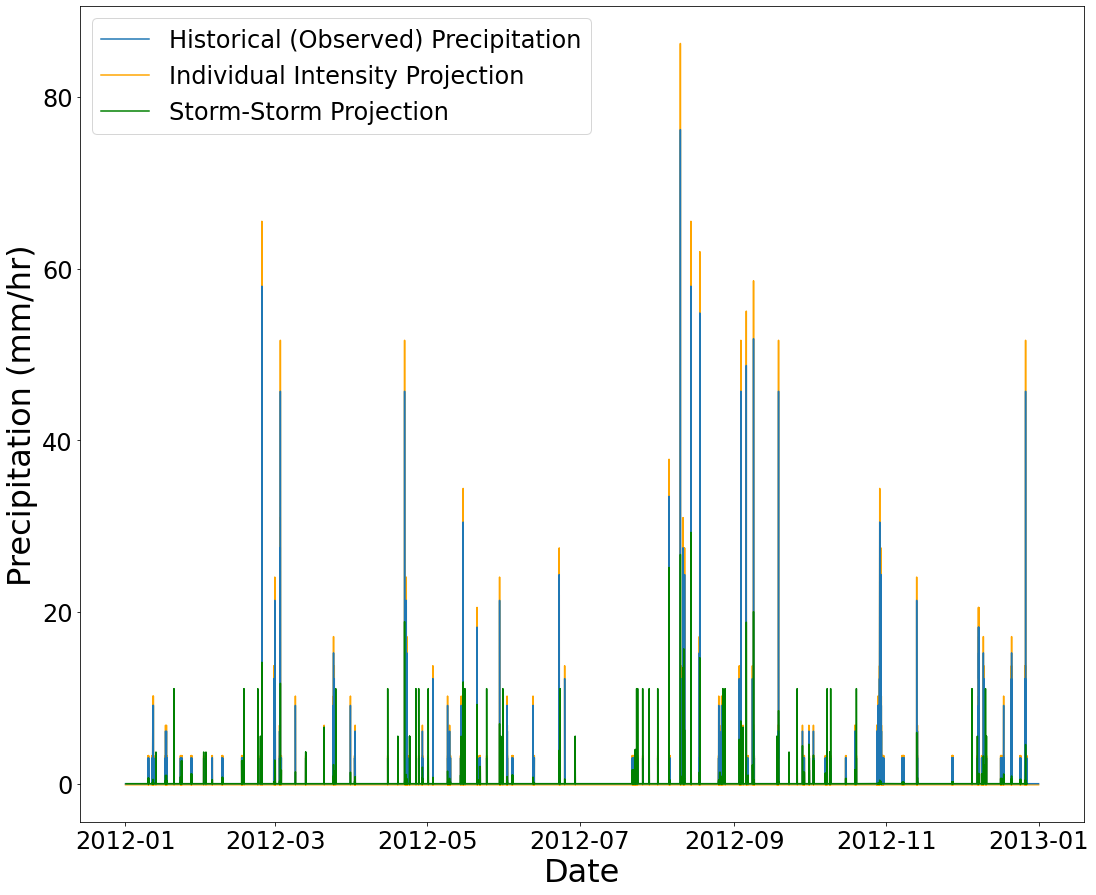

In [1473]:
x1 = historical['datetime']
y1 = historical['pr']

x2 = x1
y2 = projected_by_intensity['Projected pr']

x3 = projected.datetime
y3 = projected.projected_pr

plt.rcParams.update({'font.size': 24})

# Create the line plot with different colors
plt.figure(figsize=(18,15))
plt.plot(x2, y2, label='Individual Intensity Projection', color = 'orange')
plt.plot(x1, y1, label='Historical (Observed) Precipitation')
plt.plot(x3, y3, label='Storm-Storm Projection', color = 'green')

# plt.xlim(15641, 15643.5)  # Set x-axis limits from 0 to 20
# plt.ylim(-.25, 7)   # Set y-axis limits from -2 to 20 

# Add labels and title
plt.xlabel("Date", fontsize = 32)
plt.ylabel("Precipitation (mm/hr)", fontsize = 32)
# plt.title("Coarse Time Step", fontsize = 36)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# Add legend
# plt.legend()

# Show the plot
plt.show()

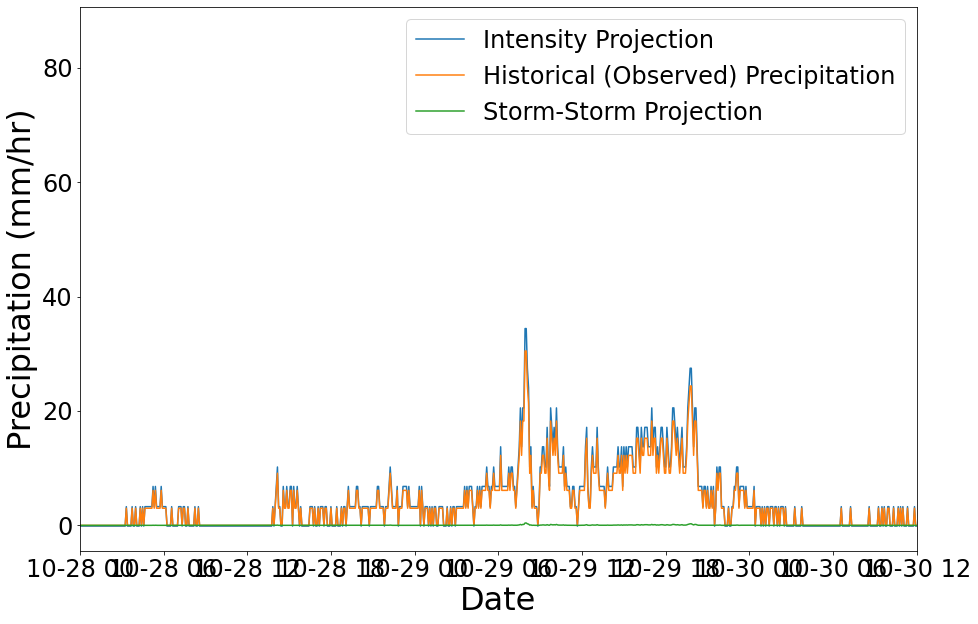

In [1464]:
x1 = historical['datetime']
y1 = historical['pr']

x2 = x1
y2 = projected_by_intensity['Projected pr']

x3 = projected.datetime
y3 = projected.projected_pr

plt.rcParams.update({'font.size': 24})

# Create the line plot with different colors
plt.figure(figsize=(15,10))
plt.plot(x2, y2, label='Intensity Projection')
plt.plot(x1, y1, label='Historical (Observed) Precipitation')
plt.plot(x3, y3, label='Storm-Storm Projection')

plt.xlim(15641, 15643.5)  # Set x-axis limits from 0 to 20
# plt.ylim(-.25, 7)   # Set y-axis limits from -2 to 20 

# Add labels and title
plt.xlabel("Date", fontsize = 32)
plt.ylabel("Precipitation (mm/hr)", fontsize = 32)
# plt.title("Coarse Time Step", fontsize = 36)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [1164]:
len(projected.index)

103768

In [ ]:
storms_data = read_csv('sample_past_precip.csv')
storms_data = read_netcdf4('CONUS404-19791001-20221001-Dover-Air-Force-Base.nc')
TS = find_timestep(storms_data)
max_each_year = separate_into_durations(storms_data, stormDurations)
past_CDF = compute_CDF(max_each_year, stormDurations)
historical = read_historical_csv('2012_historical.csv')
hist_TS = find_timestep(historical)
discretize_by_storm(historical, dry_time_between_storms)

